In [42]:
import json
import re
import time
import os
from os import path
from matplotlib.pyplot import figure
from PIL import Image
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


tweets_path = 'donald_data.json'
tweets_data = []
tweets_file = open(tweets_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweet['full_text'] = re.sub(r"http\S+", "", tweet['full_text'])
        if tweet['full_text'] != "":
            tweets_data.append(tweet)
    except:
        continue
tweets_data.reverse()

tweets = pd.DataFrame(data=[tweet['full_text'] for tweet in tweets_data], columns=['Text'])
tweets['Time'] = np.array([tweet['created_at'] for tweet in tweets_data])
tweets['Likes'] = np.array([tweet['favorite_count'] for tweet in tweets_data])
tweets['RTs'] = np.array([tweet['retweet_count'] for tweet in tweets_data])
tweets['Char count'] = np.array([len(tweet['full_text']) for tweet in tweets_data])

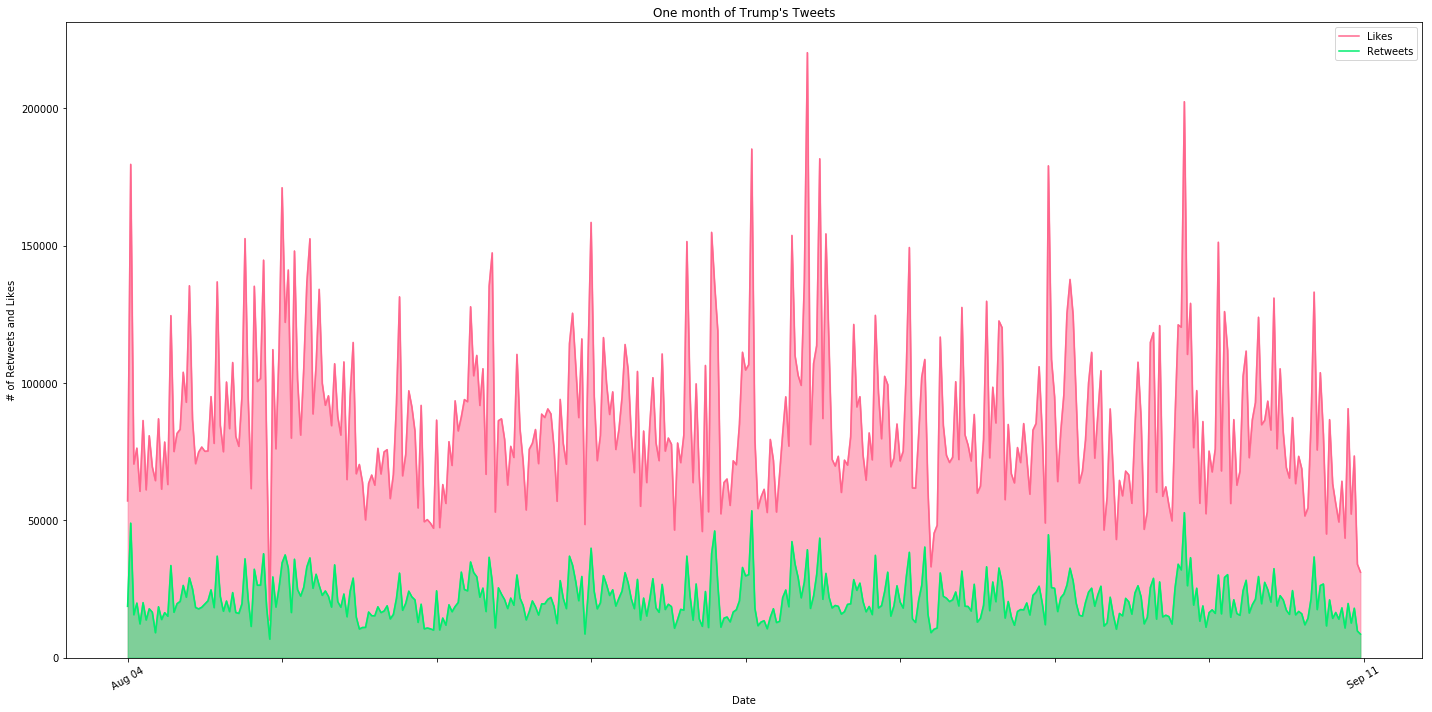

In [43]:
# This provides a visualization of the past 400 of Trump's tweets, specifically their Likes/Retweets. Credit to Rodolfo Ferro for providing a basic guide to pandas and to the regex expression I used in clean_text()
length = len(tweets_data)
likes = pd.Series(data=tweets[length-401:length-1]['Likes'].values, index=tweets[length-401:length-1]['Time'])
rt = pd.Series(data=tweets[length-401:length-1]['RTs'].values, index=tweets[length-401:length-1]['Time'])

plot = likes.plot(figsize=(20,10), color=(1, 0.40, 0.553), label='Likes', legend=True, title="One month of Trump's Tweets")
rt.plot(figsize=(20,10), color=(0, 0.93, .43), label='Retweets', legend=True)
likes.plot.area(color=(1, 0.40, 0.553), alpha=0.5)
rt.plot.area(color=(0, 0.93, .43), alpha=0.5)

plot.set_ylabel("# of Retweets and Likes")
plot.set_xlabel("Date")
plot.set_xticklabels(['', 'Aug 04', '', '', '', '', '', '', '', 'Sep 11'], rotation = 30)
plt.tight_layout()

In [3]:
# This finds and outputs the tweets that have the most and least Likes/Retweets in the entire timeline that was pulled from the Twitter API
likes_max = np.max(tweets['Likes'])
rt_max = np.max(tweets['RTs'])
likes_index_max = tweets[tweets.Likes == likes_max].index[0]
rt_index_max  = tweets[tweets.RTs == rt_max].index[0]
likes_min = np.min(tweets['Likes'])
rt_min = np.min(tweets['RTs'])
likes_index_min = tweets[tweets.Likes ==likes_min].index[0]
rt_index_min  = tweets[tweets.RTs == rt_min].index[0]

print("The most liked Tweet, with {} likes: {}\n".format(tweets['Likes'][likes_index_max], tweets['Text'][likes_index_max]))
print("The most retweeted Tweet, with {} retweets: {}\n".format(tweets['RTs'][rt_index_max], tweets['Text'][rt_index_max]))
print("The least liked Tweet, with {} likes: {}\n".format(tweets['Likes'][likes_index_min], tweets['Text'][likes_index_min]))
print("The least retweeted Tweet, with {} retweets: {}\n".format(tweets['RTs'][rt_index_min], tweets['Text'][rt_index_min]))

The most liked Tweet, with 597274 likes: Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!

The most retweeted Tweet, with 255843 retweets: Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!

The least liked Tweet, with 2659 likes: @MarkBurnettTV @RealRomaDowney From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trade Deficits of more than 12 Trillion Dollars. Last year we had a Trade Deficit of almost 800 Billion Dollars. Bad policies &amp; leadership. Must win again!  #MAGA

The least retweeted Tweet, with 1114 retweets: @MarkBurnettTV @RealRomaDowney From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trad

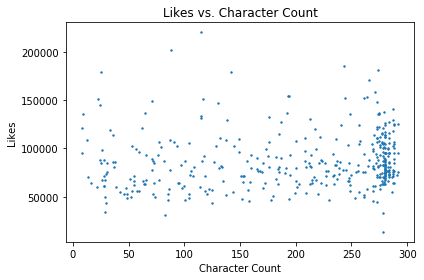

In [34]:
# Checks to see if there's any correlation between length of tweet and amount of likes
correlation = pd.Series(data = tweets[length-401:length-1]['Likes'].values, index = tweets[length-401:length-1]['Char count'].values)
plt.scatter(correlation.index, correlation, s=2)
plt.title('Likes vs. Character Count')
plt.xlabel('Character Count')
plt.ylabel('Likes')
plt.tight_layout()

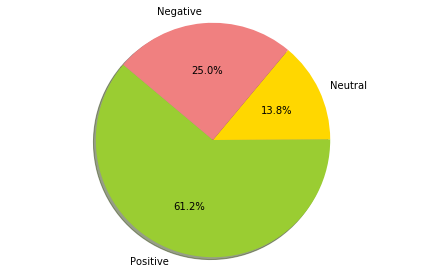

In [7]:
# Analyzes "sentiment" of each tweet and puts it in a pie chart
sentiment = [0,0,0]
def count_sentiment(index):
    global sentiment
    sentiment[index] += 1
def clean_text (text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ", text).split())

def sentiment_analysis (text):
    subject = TextBlob(clean_text(text))
    if subject.sentiment.polarity > 0:
        count_sentiment(0)
        return 1
    elif subject.sentiment.polarity == 0:
        count_sentiment(1)
        return 0
    else:
        count_sentiment(2)
        return -1

tweets['Sentiment'] = np.array([sentiment_analysis(tweet['full_text']) for tweet in tweets_data])
sizes = sentiment
labels = 'Positive', 'Neutral', 'Negative'
colors = ['yellowgreen', 'gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.tight_layout()

In [64]:
# Extracts word phrases from all of the tweets
phrases_list = []
def phrase (text):
    phrases = TextBlob(clean_text(text)).noun_phrases
    for Word in phrases:
        phrases_list.append(Word)
    return phrases

tweets['Phrases'] = np.array([phrase(tweet['full_text']) for tweet in tweets_data])
phrases_string = ' '.join(phrases_list)
display(tweets.head(100))

,Text,Time,Likes,RTs,Char count,Phrases
0,I look forward to working w/ D's + R's in Cong...,Tue Sep 05 20:45:27 +0000 2017,98351,22529,140,"[congress, address immigration reform, country..."
1,Congress now has 6 months to legalize DACA (so...,Wed Sep 06 00:38:27 +0000 2017,87620,22484,139,"[daca, obama]"
2,Will be going to North Dakota today to discuss...,Wed Sep 06 10:47:01 +0000 2017,85389,16359,136,"[will, dakota, tax reform, tax cuts]"
3,"Watching Hurricane closely. My team, which has...",Wed Sep 06 10:51:52 +0000 2017,104511,20181,138,"[watching hurricane, good job, texas, florida]"
4,Hurricane looks like largest ever recorded in ...,Wed Sep 06 10:53:45 +0000 2017,56660,12226,59,"[hurricane, atlantic]"
5,'President Donald J. Trump Approves Emergency ...,Wed Sep 06 17:52:30 +0000 2017,47927,13669,70,[donald j trump approves emergency declarations]
6,"Just spoke w/ Governors Rick Scott of Florida,...",Wed Sep 06 19:26:09 +0000 2017,68838,16944,145,"[governors rick scott, florida kenneth mapp, s..."
7,Wonderful to be in North Dakota with the incre...,Wed Sep 06 23:20:48 +0000 2017,40718,8396,122,"[wonderful, dakota, men amp women, andeavor re..."
8,"Thank you for joining me in Mandan, ND Gov. @D...",Thu Sep 07 00:04:12 +0000 2017,31779,6108,139,"[thank, mandan nd gov lt gov]"
9,"If we want to renew our PROSPERITY, restore OP...",Thu Sep 07 00:18:49 +0000 2017,66372,16109,145,"[prosperity, opportunity, amp re, dominance, t..."


In [62]:
# Frequency of certain phrases
print('The phrase "fake news" appears {} times\n'.format(phrases_string.lower().count("fake news")))
print('The phrase "collusion" appears {} times\n'.format(phrases_string.lower().count("collusion")))
print('The phrase "witch hunt" appears {} times\n'.format(phrases_string.lower().count("witch hunt")))
print('The phrase "big" appears {} times\n'.format(phrases_string.lower().count("big")))
print('The phrase "china" appears {} times\n'.format(phrases_string.lower().count("china")))
print('The phrase "donald trump" appears {} times\n'.format(phrases_string.lower().count("donald trump")))

The phrase "fake news" appears 37 times

The phrase "collusion" appears 87 times

The phrase "witch hunt" appears 105 times

The phrase "big" appears 178 times

The phrase "china" appears 95 times

The phrase "donald trump" appears 31 times



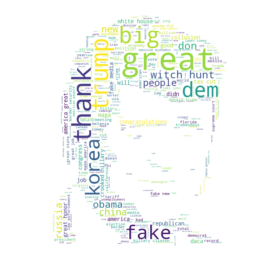

In [63]:
# Puts all of the tweets in a wordcloud
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

trump_mask = np.array(Image.open(path.join(d, "trump_stencil_1.jpg")))
stopwords = set(STOPWORDS)
stopwords.add("amp")

wc = WordCloud(background_color="white", stopwords=stopwords, max_words=2000, mask=trump_mask, contour_width=0)
wc.generate(phrases_string)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()